In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
pima = pd.read_csv('C:/Users/seob/Desktop/ml,dl/pimaindiansdiabetescsv/pima.csv',
                  names=['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
print(pima.shape)
pima.head()

(768, 9)


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
display(pima.info())
display(pima.describe())
display(pima.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
bmi          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
bmi          0
pedigree     0
age          0
class        0
dtype: int64

In [5]:
pima['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

class 1 : 당뇨  
0 : 당뇨아님

In [6]:
pima[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='class', ascending=False)

,pregnant,class
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


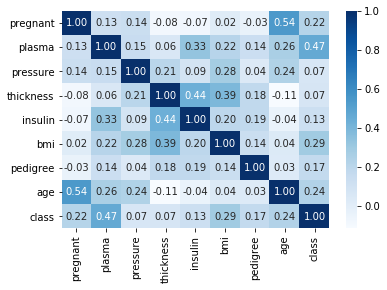

In [7]:
sns.heatmap(pima.corr(), annot=True, fmt='.2f', cmap='Blues')

class와 상관관계 제일 높은 것  
- plasma(공복혈당농도)

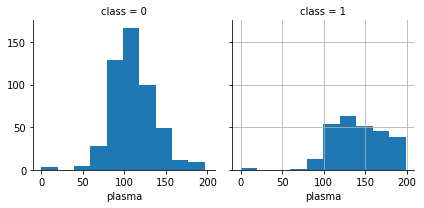

In [12]:
f = sns.FacetGrid(data=pima, col='class')
f.map(plt.hist, 'plasma')
plt.grid()

In [24]:
from keras import models, layers, optimizers

In [14]:
np.random.seed(0)
tf.set_random_seed(0)

In [15]:
pima.head(2)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [17]:
df = pima.values

In [22]:
y = df[:,8]
X = df[:, 0:8]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [23]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=8, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train on 614 samples, validate on 154 samples
Epoch 1/200
614/614 [==============================] - 2s 3ms/step - loss: 3.8538 - acc: 0.5261 - val_loss: 1.5606 - val_acc: 0.5909
Epoch 2/200
614/614 [==============================] - 0s 248us/step - loss: 2.6545 - acc: 0.5423 - val_loss: 1.2130 - val_acc: 0.6234
Epoch 3/200
614/614 [==============================] - 0s 256us/step - loss: 1.7603 - acc: 0.5717 - val_loss: 1.0592 - val_acc: 0.5195
Epoch 4/200
614/614 [==============================] - 0s 218us/step - loss: 1.1236 - acc: 0.6205 - val_loss: 0.6717 - val_acc: 0.6364
Epoch 5/200
614/614 [==============================] - 0s 249us/step - loss: 0.8720 - acc: 0.6645 - val_loss: 0.6889 - val_acc: 0.5844
Epoch 6/200
614/614 [==============================] - 0s 230us/step - loss: 0.8169 - acc: 0.6678 - val_loss: 0.6708 - val_acc: 0.6169
Epoch 7/200
614/614 [==============================] - 0s 241us/step - loss: 0.7388 - acc: 0.6694 - val_loss: 0.7109 - val_acc: 0.5779
Epoch 8/200

Epoch 61/200
614/614 [==============================] - 0s 353us/step - loss: 0.5456 - acc: 0.7329 - val_loss: 0.6285 - val_acc: 0.6494
Epoch 62/200
614/614 [==============================] - 0s 290us/step - loss: 0.5355 - acc: 0.7248 - val_loss: 0.6638 - val_acc: 0.6623
Epoch 63/200
614/614 [==============================] - 0s 257us/step - loss: 0.5565 - acc: 0.7345 - val_loss: 0.6182 - val_acc: 0.6623
Epoch 64/200
614/614 [==============================] - 0s 243us/step - loss: 0.5650 - acc: 0.7264 - val_loss: 0.6155 - val_acc: 0.6558
Epoch 65/200
614/614 [==============================] - 0s 264us/step - loss: 0.5552 - acc: 0.7150 - val_loss: 0.6198 - val_acc: 0.6558
Epoch 66/200
614/614 [==============================] - 0s 241us/step - loss: 0.5445 - acc: 0.7248 - val_loss: 0.6404 - val_acc: 0.6688
Epoch 67/200
614/614 [==============================] - 0s 300us/step - loss: 0.5544 - acc: 0.7296 - val_loss: 0.6384 - val_acc: 0.6558
Epoch 68/200
614/614 [==========================

614/614 [==============================] - 0s 261us/step - loss: 0.5202 - acc: 0.7410 - val_loss: 0.6333 - val_acc: 0.7013
Epoch 122/200
614/614 [==============================] - 0s 251us/step - loss: 0.5680 - acc: 0.7182 - val_loss: 0.6597 - val_acc: 0.6753
Epoch 123/200
614/614 [==============================] - 0s 322us/step - loss: 0.5377 - acc: 0.7557 - val_loss: 0.6556 - val_acc: 0.6688
Epoch 124/200
614/614 [==============================] - 0s 243us/step - loss: 0.5177 - acc: 0.7492 - val_loss: 0.6450 - val_acc: 0.6753
Epoch 125/200
614/614 [==============================] - 0s 274us/step - loss: 0.5479 - acc: 0.7329 - val_loss: 0.6634 - val_acc: 0.6818
Epoch 126/200
614/614 [==============================] - 0s 274us/step - loss: 0.5547 - acc: 0.7394 - val_loss: 0.6462 - val_acc: 0.6883
Epoch 127/200
614/614 [==============================] - 0s 267us/step - loss: 0.5587 - acc: 0.7248 - val_loss: 0.6143 - val_acc: 0.7013
Epoch 128/200
614/614 [==============================] 

Epoch 181/200
614/614 [==============================] - 0s 248us/step - loss: 0.5348 - acc: 0.7394 - val_loss: 0.6383 - val_acc: 0.7078
Epoch 182/200
614/614 [==============================] - 0s 246us/step - loss: 0.5087 - acc: 0.7655 - val_loss: 0.6688 - val_acc: 0.7013
Epoch 183/200
614/614 [==============================] - 0s 347us/step - loss: 0.5147 - acc: 0.7590 - val_loss: 0.6069 - val_acc: 0.7273
Epoch 184/200
614/614 [==============================] - 0s 231us/step - loss: 0.5185 - acc: 0.7492 - val_loss: 0.6101 - val_acc: 0.7078
Epoch 185/200
614/614 [==============================] - 0s 311us/step - loss: 0.5296 - acc: 0.7410 - val_loss: 0.6665 - val_acc: 0.6753
Epoch 186/200
614/614 [==============================] - 0s 244us/step - loss: 0.5118 - acc: 0.7459 - val_loss: 0.6163 - val_acc: 0.6948
Epoch 187/200
614/614 [==============================] - 0s 238us/step - loss: 0.5045 - acc: 0.7590 - val_loss: 0.6458 - val_acc: 0.7078
Epoch 188/200
614/614 [==================

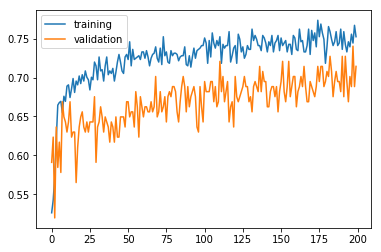

In [27]:
history = model.fit(X, y, batch_size=10, epochs=200, validation_split=0.2)
print('\n\n accuracy : {:.4f}'.format(model.evaluate(X, y)[1]))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'best')
plt.show()

Train on 614 samples, validate on 154 samples
Epoch 1/200
614/614 [==============================] - 1s 1ms/step - loss: 0.5375 - acc: 0.7362 - val_loss: 0.6272 - val_acc: 0.6883
Epoch 2/200
614/614 [==============================] - 0s 311us/step - loss: 0.5162 - acc: 0.7313 - val_loss: 0.6756 - val_acc: 0.6948
Epoch 3/200
614/614 [==============================] - 0s 238us/step - loss: 0.5188 - acc: 0.7394 - val_loss: 0.6598 - val_acc: 0.6948
Epoch 4/200
614/614 [==============================] - 0s 241us/step - loss: 0.5246 - acc: 0.7476 - val_loss: 0.6741 - val_acc: 0.7208
Epoch 5/200
614/614 [==============================] - 0s 220us/step - loss: 0.5123 - acc: 0.7557 - val_loss: 0.6299 - val_acc: 0.6753
Epoch 6/200
614/614 [==============================] - 0s 313us/step - loss: 0.4876 - acc: 0.7687 - val_loss: 0.6095 - val_acc: 0.7273
Epoch 7/200
614/614 [==============================] - 0s 248us/step - loss: 0.5105 - acc: 0.7606 - val_loss: 0.6345 - val_acc: 0.6883
Epoch 8/200

Epoch 61/200
614/614 [==============================] - 0s 309us/step - loss: 0.4967 - acc: 0.7541 - val_loss: 0.6212 - val_acc: 0.7143
Epoch 62/200
614/614 [==============================] - 0s 437us/step - loss: 0.4996 - acc: 0.7671 - val_loss: 0.6297 - val_acc: 0.7078
Epoch 63/200
614/614 [==============================] - 0s 340us/step - loss: 0.4971 - acc: 0.7687 - val_loss: 0.6570 - val_acc: 0.6948
Epoch 64/200
614/614 [==============================] - 0s 516us/step - loss: 0.4855 - acc: 0.7573 - val_loss: 0.7287 - val_acc: 0.6883
Epoch 65/200
614/614 [==============================] - 0s 456us/step - loss: 0.4948 - acc: 0.7655 - val_loss: 0.6471 - val_acc: 0.7013
Epoch 66/200
614/614 [==============================] - 0s 319us/step - loss: 0.4906 - acc: 0.7524 - val_loss: 0.7038 - val_acc: 0.6818
Epoch 67/200
614/614 [==============================] - 0s 401us/step - loss: 0.4965 - acc: 0.7769 - val_loss: 0.6632 - val_acc: 0.7078
Epoch 68/200
614/614 [==========================

614/614 [==============================] - 0s 311us/step - loss: 0.4801 - acc: 0.7704 - val_loss: 0.6916 - val_acc: 0.6883
Epoch 122/200
614/614 [==============================] - 0s 267us/step - loss: 0.4664 - acc: 0.7818 - val_loss: 0.7129 - val_acc: 0.6883
Epoch 123/200
614/614 [==============================] - 0s 246us/step - loss: 0.4718 - acc: 0.7818 - val_loss: 0.6721 - val_acc: 0.6883
Epoch 124/200
614/614 [==============================] - 0s 293us/step - loss: 0.4592 - acc: 0.7736 - val_loss: 0.6775 - val_acc: 0.7078
Epoch 125/200
614/614 [==============================] - 0s 313us/step - loss: 0.4577 - acc: 0.7752 - val_loss: 0.6775 - val_acc: 0.7013
Epoch 126/200
614/614 [==============================] - 0s 396us/step - loss: 0.4521 - acc: 0.7997 - val_loss: 0.7092 - val_acc: 0.7078
Epoch 127/200
614/614 [==============================] - 0s 275us/step - loss: 0.4621 - acc: 0.7866 - val_loss: 0.7005 - val_acc: 0.6948
Epoch 128/200
614/614 [==============================] 

Epoch 181/200
614/614 [==============================] - 0s 270us/step - loss: 0.4578 - acc: 0.7801 - val_loss: 0.6740 - val_acc: 0.7273
Epoch 182/200
614/614 [==============================] - 0s 262us/step - loss: 0.4395 - acc: 0.7866 - val_loss: 0.6659 - val_acc: 0.7208
Epoch 183/200
614/614 [==============================] - 0s 267us/step - loss: 0.4344 - acc: 0.7850 - val_loss: 0.6893 - val_acc: 0.6948
Epoch 184/200
614/614 [==============================] - 0s 248us/step - loss: 0.4340 - acc: 0.7964 - val_loss: 0.6844 - val_acc: 0.6753
Epoch 185/200
614/614 [==============================] - 0s 264us/step - loss: 0.4481 - acc: 0.7932 - val_loss: 0.6647 - val_acc: 0.7273
Epoch 186/200
614/614 [==============================] - 0s 272us/step - loss: 0.4459 - acc: 0.7964 - val_loss: 0.7132 - val_acc: 0.7078
Epoch 187/200
614/614 [==============================] - 0s 349us/step - loss: 0.4202 - acc: 0.8062 - val_loss: 0.6771 - val_acc: 0.7013
Epoch 188/200
614/614 [==================

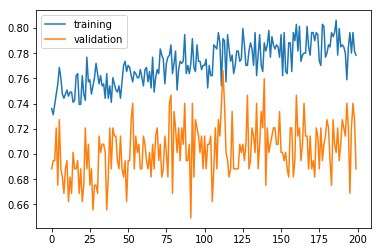

In [28]:
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, batch_size=10, epochs=200, validation_split=0.2)
print('\n\n accuracy : {:.4f}'.format(model.evaluate(X, y)[1]))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'best')
plt.show()

optimizer Adam이 RMSprop보다 성능이 더 잘나왔습니다.